In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('customer churn data.csv')
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


 #Replace blanks with 0 as tenure is 0 and no tatal charges are recorded

In [20]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
#df["TotalCharges"]=df["TotalCharges"].astype("float")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
df.isnull().sum().sum()

0

In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [25]:
df.duplicated().sum()

0

In [26]:
df["customerID"].duplicated().sum()

0

 #convert senior citizen from 0 and 1 to yes/no to make it easier to understand

In [27]:
def conv(value):
  if value==1:
    return "yes"
  else:
    return "no"
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

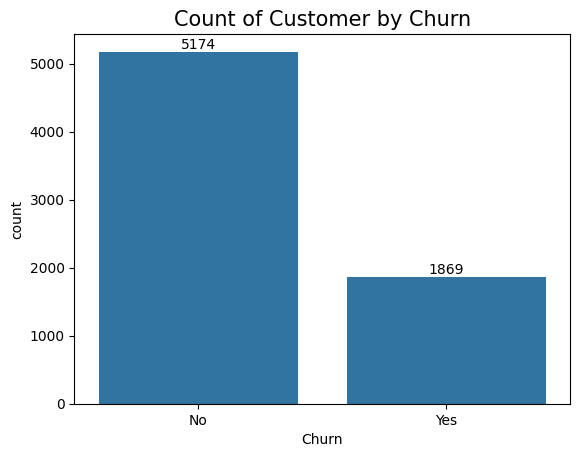

In [28]:
import seaborn as sns
ax=sns.countplot(x='Churn',data=df)
ax.set_title("Count of Customer by Churn",fontsize=15)
ax.bar_label(ax.containers[0])
plt.show()

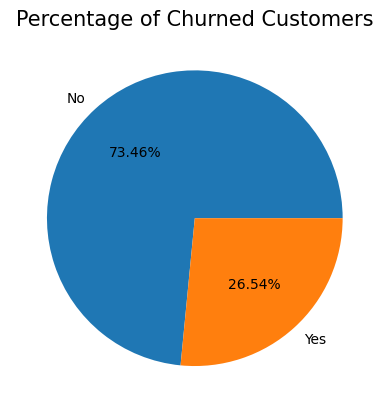

In [29]:
gb=df.groupby("Churn").agg({'Churn':"count"})
gb
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize=15)
plt.show()

 #from the given pie chart we can conclude that 26.54% cutomers have churned out
 #now exlore the reason behind it

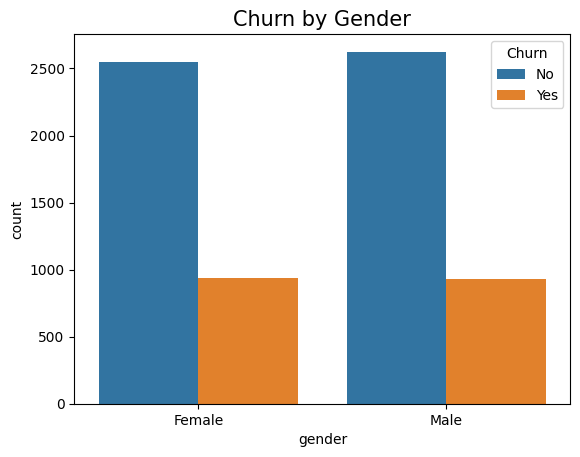

In [30]:
sns.countplot(x='gender',data=df,hue='Churn')
plt.title('Churn by Gender',fontsize=15)
plt.show()

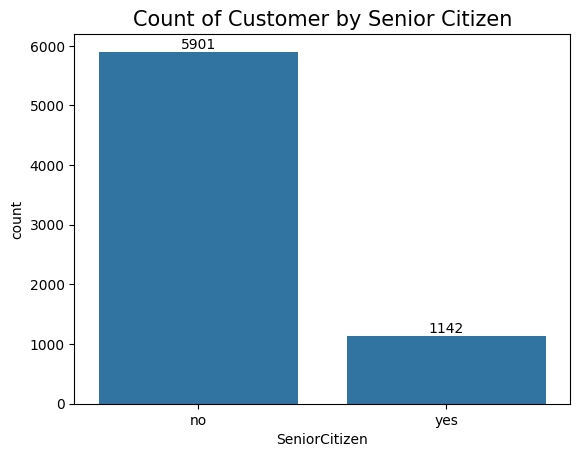

In [31]:
ax=sns.countplot(x='SeniorCitizen',data=df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customer by Senior Citizen',fontsize=15)
plt.show()

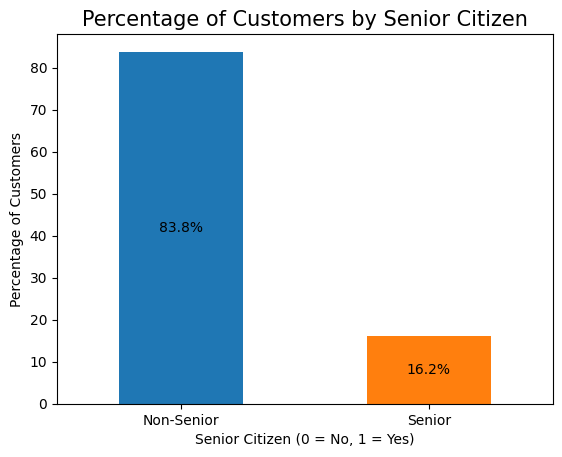

In [32]:
senior_counts = df['SeniorCitizen'].value_counts()

# Calculate the percentage
senior_percentage = senior_counts / senior_counts.sum() * 100

# Plotting the stacked bar chart
ax = senior_percentage.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

# Adding labels to each bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2, f'{height:.1f}%', ha='center', va='center')

# Adding title and labels
plt.title('Percentage of Customers by Senior Citizen', fontsize=15)
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Percentage of Customers')
plt.xticks([0, 1], ['Non-Senior', 'Senior'], rotation=0)

# Display the plot
plt.show()

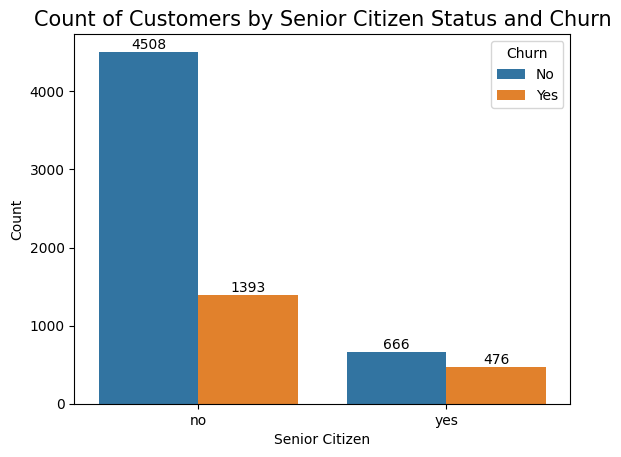

In [34]:
ax = sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# Set plot title and labels
plt.title('Count of Customers by Senior Citizen Status and Churn', fontsize=15)
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])

# Show the plot
plt.show()

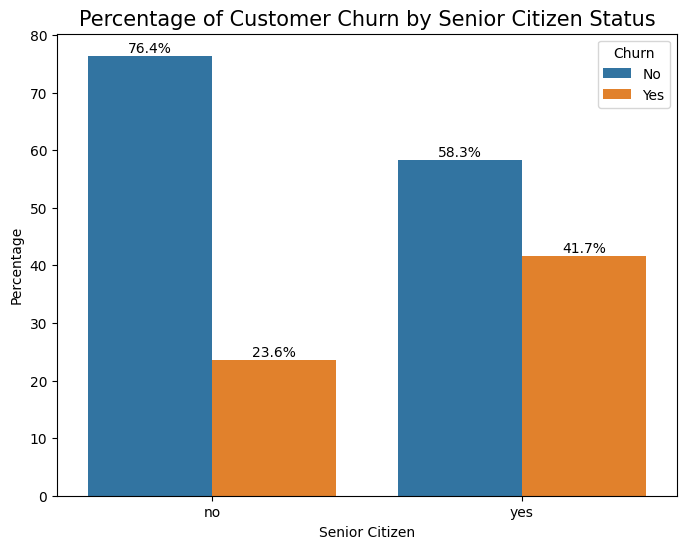

In [35]:
df_percentage = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')
df_percentage['Percentage'] = df_percentage.groupby('SeniorCitizen')['Count'].transform(lambda x: x / x.sum() * 100)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='SeniorCitizen', y='Percentage', hue='Churn', data=df_percentage, ax=ax)

# Adding percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

# Title and labels
plt.title('Percentage of Customer Churn by Senior Citizen Status', fontsize=15)
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.show()

 #comparatively a larger percentage of people in senior citizen category have curned.

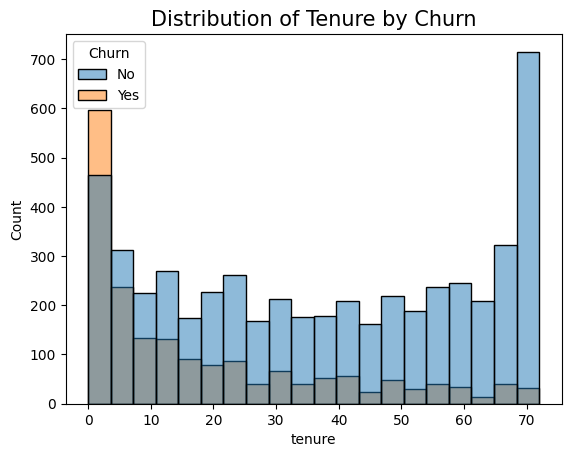

In [39]:
sns.histplot(x='tenure',data=df,hue='Churn',bins=20)
plt.title("Distribution of Tenure by Churn",fontsize=15)
plt.show()

 #from the above histogram chart we can conclude that if tenure is more churned customer is less and if tenure is less churned customer is more

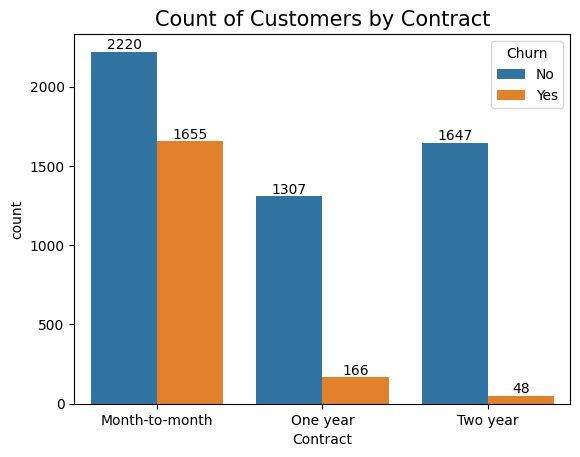

In [40]:
ax=sns.countplot(x='Contract',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Contract",fontsize=15)
plt.show()

 #People who have month to month contract are likely to churn then from those who have 1 or 2 years of contract.

In [41]:
df.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

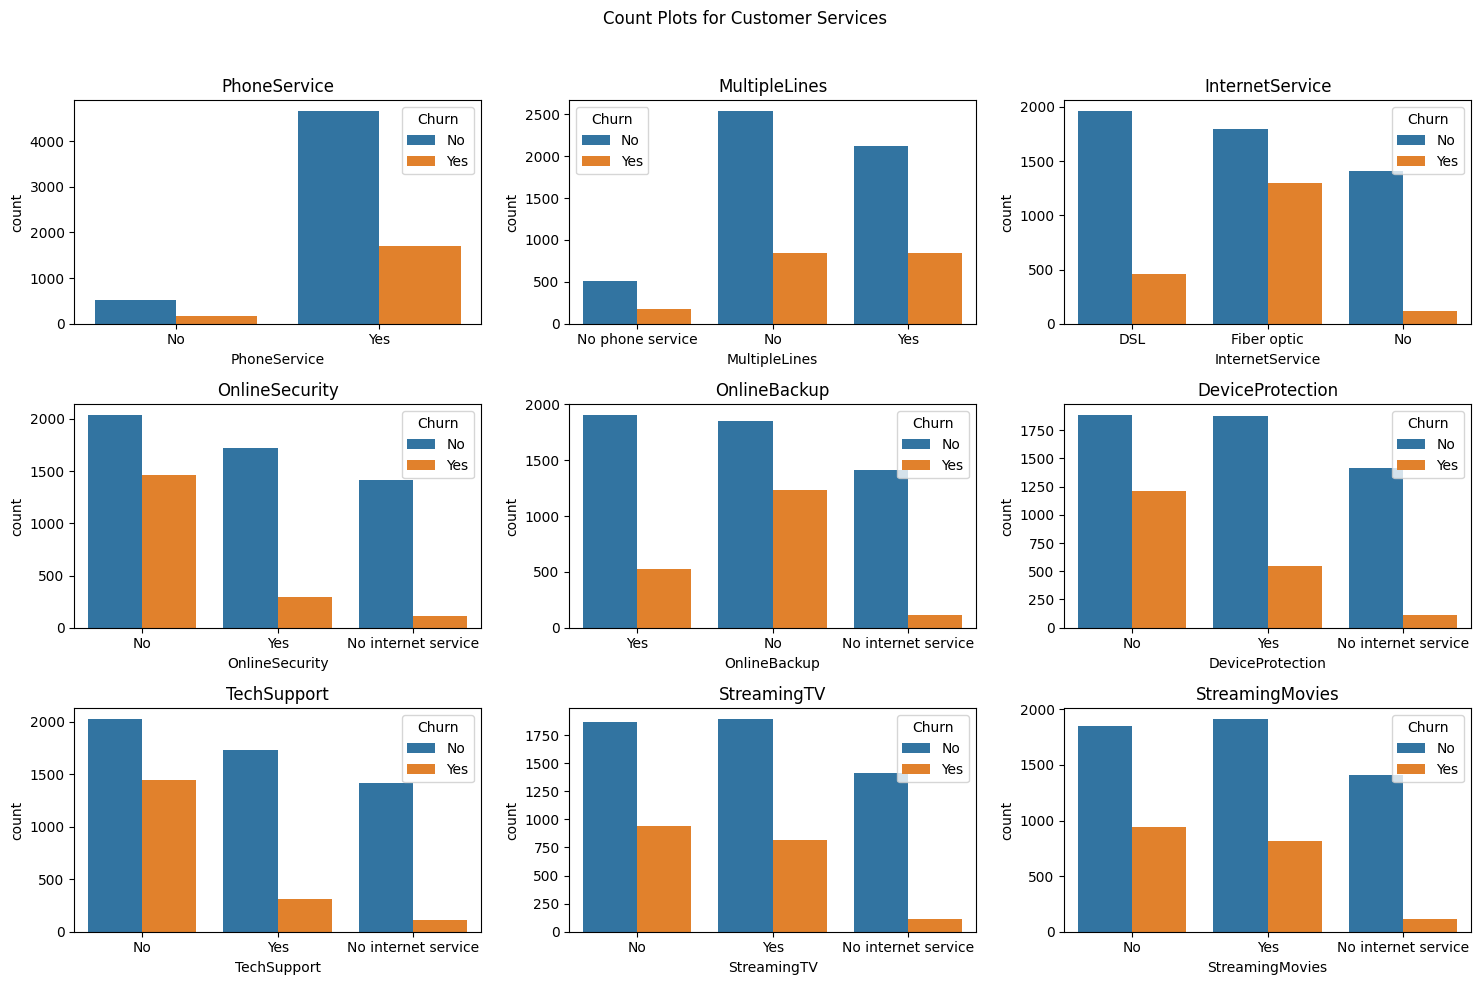

In [52]:
# List of columns you want to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplot grid
num_cols = 3
num_rows = len(columns) // num_cols + int(len(columns) % num_cols > 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.suptitle("Count Plots for Customer Services")

# Flatten axes for easy iteration
axes = axes.flatten()

# Generate a count plot for each column
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i],hue="Churn")
    axes[i].set_title(col)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for title
plt.show()

 #customers who do not subscribe to additional services like Online Security, Online Backup, Device Protection, and Tech Support have a higher churn rate. Among internet services, fiber-optic users show a relatively higher churn compared to DSL users. Customers with only basic services (e.g., Phone Service without Multiple Lines) tend to churn less. This suggests that customers with fewer bundled services are at a higher risk of churn, potentially due to unmet service needs or dissatisfaction with value.

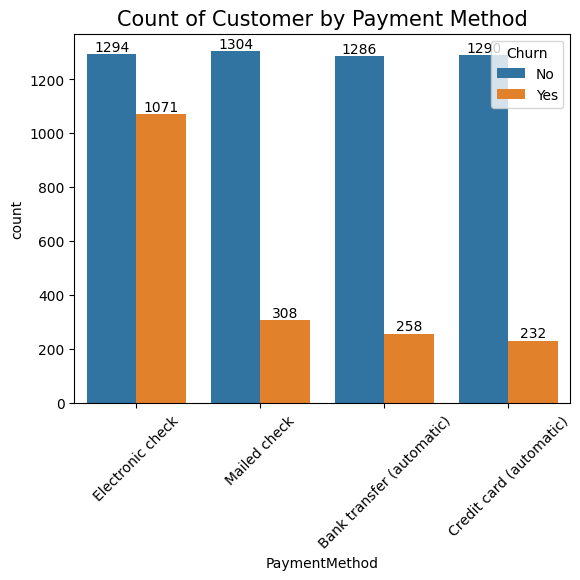

In [54]:
ax=sns.countplot(x='PaymentMethod',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of Customer by Payment Method',fontsize=15)
plt.xticks(rotation=45)
plt.show()

 #customer is likely to churn when using electronic check as a payment method.